Customer Segmentation and Credit Risk Analysis in Banking

Loading Data and Checking Columns

In [13]:
import pandas as pd

# Load the datasets
credit_card_data = pd.read_csv('C:/Users/Gizem Görünmez/Banking_Customer_Segmentation_And_Credit_Risk_Analysis/data/raw/credit_card_data.csv')


# Display the first few rows of each dataset
display(credit_card_data.head())



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Data Cleaning

In [14]:
# Check for missing values
print(credit_card_data.isnull().sum())

# Drop rows with missing values (if any)
credit_card_data_cleaned = credit_card_data.dropna()

# Check for duplicates
print(credit_card_data_cleaned.duplicated().sum())

# Drop duplicate rows (if any)
credit_card_data_cleaned = credit_card_data_cleaned.drop_duplicates()

# Save cleaned data
credit_card_data_cleaned.to_csv('C:/Users/Gizem Görünmez/Banking_Customer_Segmentation_And_Credit_Risk_Analysis/data/processed/credit_card_data_cleaned.csv', index=False)



CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
0


In [15]:
# Drop non-numeric columns that are not used in the analysis
credit_card_data_cleaned = credit_card_data.drop(columns=['CUST_ID'])



Exploratory Data Analysis (EDA)

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

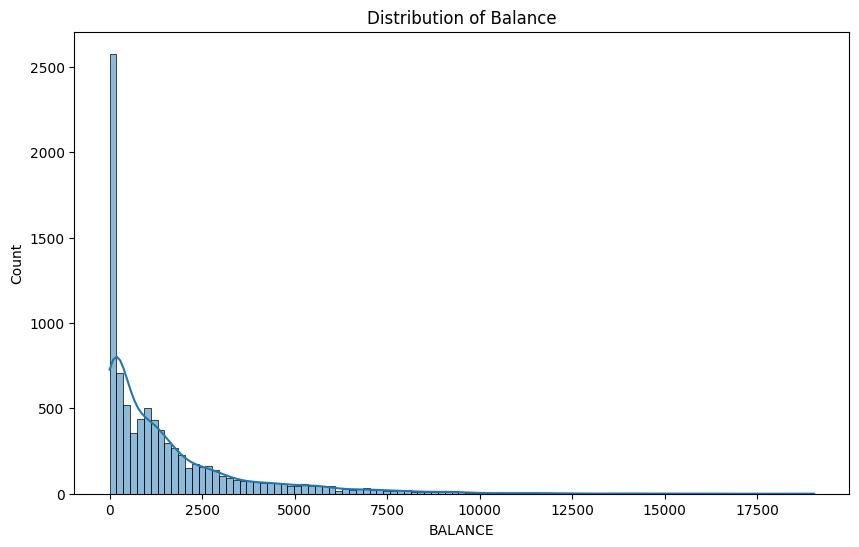

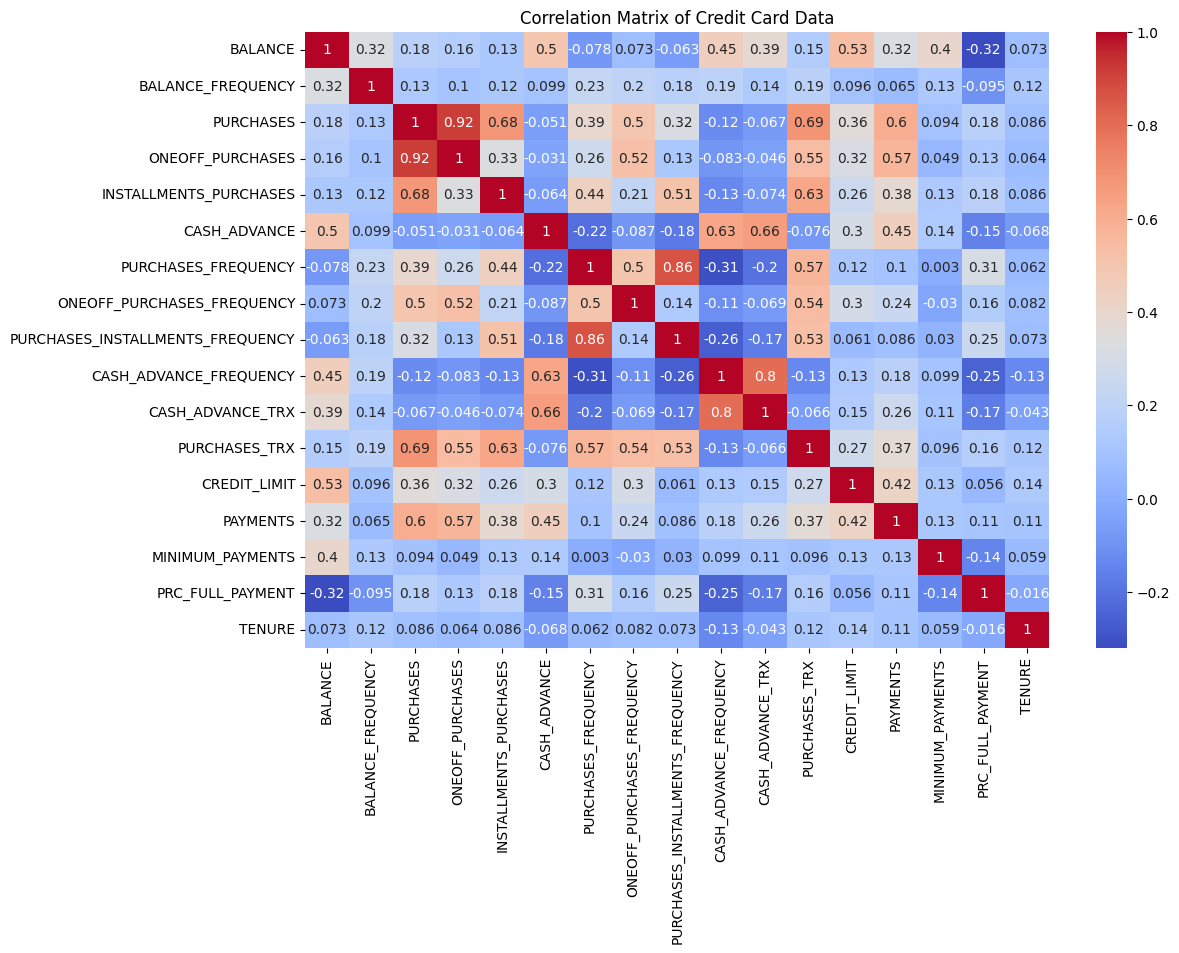

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(credit_card_data_cleaned.describe())


# Visualization of distributions
plt.figure(figsize=(10, 6))
sns.histplot(credit_card_data_cleaned['BALANCE'], kde=True)
plt.title('Distribution of Balance')
plt.show()


# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(credit_card_data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Credit Card Data')
plt.show()




In [17]:
import pandas as pd

# Load the datasets
credit_card_data = pd.read_csv('C:/Users/Gizem Görünmez/Banking_Customer_Segmentation_And_Credit_Risk_Analysis/data/raw/credit_card_data.csv')


# Display the first few rows and the column names of each dataset
display(credit_card_data.head())
display(credit_card_data.columns)



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Feature Engineering

In [18]:
# Load cleaned data
credit_card_data_cleaned = pd.read_csv('C:/Users/Gizem Görünmez/Banking_Customer_Segmentation_And_Credit_Risk_Analysis/data/processed/credit_card_data_cleaned.csv')

# Example of creating a new feature (e.g., Balance-to-Credit Limit Ratio)
credit_card_data_cleaned['Balance_to_Credit_Limit_Ratio'] = credit_card_data_cleaned['BALANCE'] / credit_card_data_cleaned['CREDIT_LIMIT']

# Save the dataset with new features
credit_card_data_cleaned.to_csv('C:/Users/Gizem Görünmez/Banking_Customer_Segmentation_And_Credit_Risk_Analysis/data/processed/credit_card_data_featured.csv', index=False)



Customer Segmentation

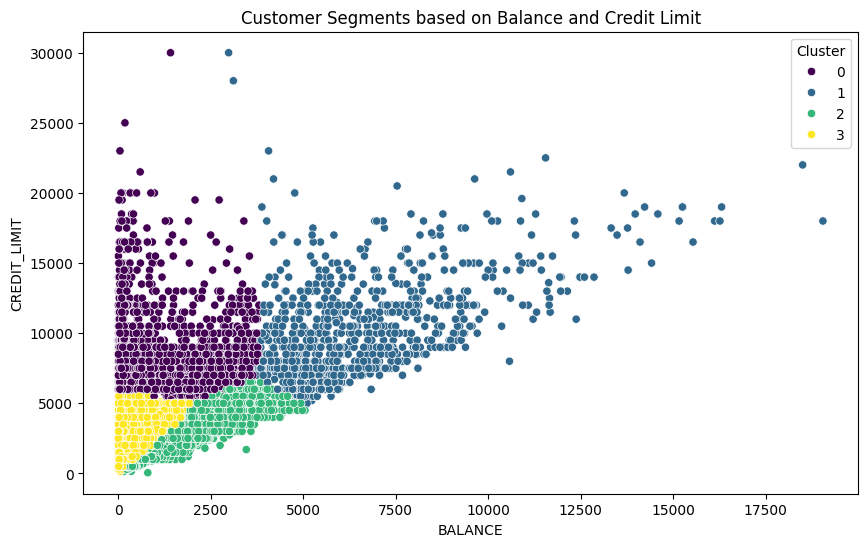

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data with features
credit_card_data_featured = pd.read_csv('C:/Users/Gizem Görünmez/Banking_Customer_Segmentation_And_Credit_Risk_Analysis/data/processed/credit_card_data_featured.csv')

# Select features for clustering
features = ['BALANCE', 'CREDIT_LIMIT', 'Balance_to_Credit_Limit_Ratio']
X = credit_card_data_featured[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
credit_card_data_featured['Cluster'] = kmeans.fit_predict(X_scaled)

# Save the segmented data
credit_card_data_featured.to_csv('C:/Users/Gizem Görünmez/Banking_Customer_Segmentation_And_Credit_Risk_Analysis/data/processed/credit_card_data_segmented.csv', index=False)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BALANCE', y='CREDIT_LIMIT', hue='Cluster', data=credit_card_data_featured, palette='viridis')
plt.title('Customer Segments based on Balance and Credit Limit')
plt.show()


credit risk analysis

In [20]:
# Load the credit card data including the target variable for credit risk
credit_card_data = pd.read_csv('C:/Users/Gizem Görünmez/Banking_Customer_Segmentation_And_Credit_Risk_Analysis/data/processed/credit_card_data_segmented.csv')

# Display the first few rows to verify
print(credit_card_data.head())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10005   817.714335           1.000000      16.00             16.00   
4  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00      0.000000             0.083333   
4                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

[[680 631]
 [651 629]]
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1311
           1       0.50      0.49      0.50      1280

    accuracy                           0.51      2591
   macro avg       0.51      0.51      0.51      2591
weighted avg       0.51      0.51      0.51      2591

             mean   sum  count
Cluster                       
0        0.482778   855   1771
1        0.516520   469    908
2        0.498270  1296   2601
3        0.504768  1694   3356


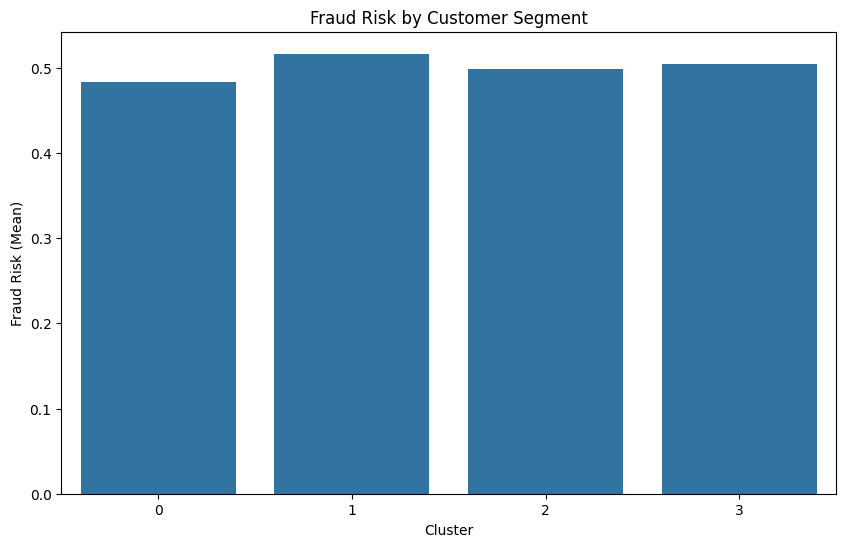

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with clusters
credit_card_data = pd.read_csv('C:/Users/Gizem Görünmez/Banking_Customer_Segmentation_And_Credit_Risk_Analysis/data/processed/credit_card_data_segmented.csv')

# Example of adding a synthetic target variable for fraud detection (you should replace this with real data if available)
import numpy as np
np.random.seed(42)
credit_card_data['Fraud'] = np.random.randint(0, 2, credit_card_data.shape[0])

# Define features and target variable for credit risk analysis
features_risk = ['BALANCE', 'CREDIT_LIMIT', 'Balance_to_Credit_Limit_Ratio', 'PURCHASES', 'CASH_ADVANCE']
X_risk = credit_card_data[features_risk]
y_risk = credit_card_data['Fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_risk, y_risk, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Analyze fraud risk within each cluster
cluster_fraud_summary = credit_card_data.groupby('Cluster')['Fraud'].agg(['mean', 'sum', 'count'])
print(cluster_fraud_summary)

# Visualize fraud risk by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_fraud_summary.index, y=cluster_fraud_summary['mean'])
plt.xlabel('Cluster')
plt.ylabel('Fraud Risk (Mean)')
plt.title('Fraud Risk by Customer Segment')
plt.show()


In [22]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Load the necessary datasets
credit_card_data = pd.read_csv('C:/Users/Gizem Görünmez/Banking_Customer_Segmentation_And_Credit_Risk_Analysis/data/processed/credit_card_data_segmented.csv')

# Assuming y_test and y_pred are defined from your model training
# If needed, you should replace these with your actual variables
# For demonstration, we'll assume they are already defined from your earlier code

# Write insights and recommendations to a text file
with open('C:/Users/Gizem Görünmez/Banking_Customer_Segmentation_And_Credit_Risk_Analysis/reports/insights_recommendations.txt', 'w') as f:
    f.write("Customer Segmentation and Credit Risk Analysis Report\n")
    f.write("----------------------------------------------------\n\n")
    
    # Summary of findings
    f.write("1. Customer Segmentation:\n")
    f.write("We identified 4 distinct customer segments based on Balance and Credit Limit.\n")
    f.write("Clusters were created using K-Means clustering, revealing varied customer profiles.\n\n")
    
    # Model performance
    f.write("2. Credit Risk Prediction:\n")
    f.write(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n\n")
    f.write(f"Classification Report:\n{classification_report(y_test, y_pred)}\n\n")
    
    # Recommendations
    f.write("3. Recommendations:\n")
    f.write("Focus on retaining high-risk customers identified by the model. Use targeted strategies to minimize churn among these high-risk groups.\n")
    f.write("Implement personalized offers and incentives tailored to different customer segments.\n")
    f.write("Consider further segmentation based on additional features for more precise targeting and strategy development.\n")
    f.write("Regularly update the models with new data to ensure accuracy and adapt to evolving customer behaviors.\n")
    f.write("Investigate fraud risk patterns within clusters to tailor risk management strategies effectively.\n")

